In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras.layers.core import Dense,Flatten
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import os
import pandas as pd
from PIL import Image
from tensorflow.keras.utils import img_to_array

2023-08-13 00:44:29.349607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

#Generating DataSet
path_root = "malimg_paper_dataset_imgs"
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(256,256), batch_size=8500)
imgs, labels = next(batches)
print(labels)


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

Found 9339 images belonging to 25 classes.
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [102]:
np.min(X_train),np.max(X_train)

(0.0, 1.0)

In [103]:
X_train.shape

(5950, 128, 128, 3)

In [104]:
X_test.shape

(2550, 128, 128, 3)

In [19]:
class_indices = np.argmax(y_train, axis=1)
y_train = class_indices.reshape((-1, 1))
y_train.shape

(5950, 1)

In [20]:
class_indices = np.argmax(y_test, axis=1)
y_test = class_indices.reshape((-1, 1))
y_test.shape

(2550, 1)

In [21]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [22]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  25
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [23]:
X_train_flat = X_train.reshape(-1,49152)
X_train_flat.shape

(23800, 49152)

In [24]:
X_test_flat = X_test.reshape(-1,49152)
X_test_flat.shape

(10200, 49152)

In [25]:
feat_cols = ['pixel'+str(i) for i in range(X_train_flat.shape[1])]
df_mal = pd.DataFrame(X_train_flat,columns=feat_cols)
df_mal['label'] = y_train
print('Size of the dataframe: {}'.format(df_mal.shape))

ValueError: Length of values (5950) does not match length of index (23800)

In [112]:
df_mal.head

<bound method NDFrame.head of         pixel0    pixel1    pixel2    pixel3    pixel4    pixel5    pixel6  \
0     0.674510  0.674510  0.674510  1.000000  1.000000  1.000000  0.047059   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.392157  0.392157  0.392157  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.062745  0.062745  0.062745  0.941176  0.941176  0.941176  0.349020   
...        ...       ...       ...       ...       ...       ...       ...   
5945  0.329412  0.329412  0.329412  0.000000  0.000000  0.000000  0.015686   
5946  0.352941  0.352941  0.352941  0.000000  0.000000  0.000000  0.000000   
5947  0.062745  0.062745  0.062745  0.941176  0.941176  0.941176  0.349020   
5948  0.352941  0.352941  0.352941  0.000000  0.000000  0.000000  0.000000   
5949  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

        pixel7    pixel8    pixel

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.90)
pca.fit(X_train_flat)
pca.n_components_

In [27]:
variance = pca.explained_variance_

# Print the variance of each principal component
for i, component in enumerate(variance):
    print("Variance of principal component {}: {}".format(i+1, component))

Variance of principal component 1: 411.2924499511719
Variance of principal component 2: 146.97564697265625
Variance of principal component 3: 136.2164764404297
Variance of principal component 4: 129.80609130859375
Variance of principal component 5: 126.7067642211914
Variance of principal component 6: 94.1010971069336
Variance of principal component 7: 57.12381362915039
Variance of principal component 8: 44.460235595703125
Variance of principal component 9: 33.124732971191406
Variance of principal component 10: 32.720191955566406
Variance of principal component 11: 31.76309585571289
Variance of principal component 12: 27.76618003845215
Variance of principal component 13: 26.25156021118164
Variance of principal component 14: 24.316818237304688
Variance of principal component 15: 23.713520050048828
Variance of principal component 16: 21.72765350341797
Variance of principal component 17: 19.09458351135254
Variance of principal component 18: 17.801095962524414
Variance of principal componen

In [91]:
variance

array([565.8857   , 293.5594   , 123.0853   , 103.918495 ,  75.49575  ,
        66.15754  ,  53.7609   ,  46.289654 ,  37.15514  ,  32.640835 ,
        28.743488 ,  27.055887 ,  23.601175 ,  22.631397 ,  22.127243 ,
        21.245644 ,  19.432098 ,  18.12933  ,  18.010193 ,  17.446903 ,
        16.06205  ,  15.880786 ,  14.426545 ,  14.301859 ,  13.597702 ,
        13.120055 ,  12.805711 ,  12.048948 ,  11.4328985,  11.21982  ],
      dtype=float32)

In [28]:
import numpy as np

# Given array with 29000 values
variance_array = variance  # Insert your array here

# Calculate the sum using np.sum()
sum_of_variances = np.sum(variance_array)

print("Sum of variances:", sum_of_variances)


Sum of variances: 2097.1409


In [29]:
train_img_pca = pca.transform(X_train_flat)
test_img_pca = pca.transform(X_test_flat)

In [31]:
train_img_pca.shape
test_img_pca.shape

(10200, 170)

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create an MLP classifier
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=33)

# Train the model
history = model.fit(train_img_pca, y_train)
print(history)

test_loss, test_acc = model.evaluate(test_img_pca, y_test)
print("Test accuracy:", test_acc)

# Make predictions
y_pred = model.predict(test_img_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [23800, 5950]

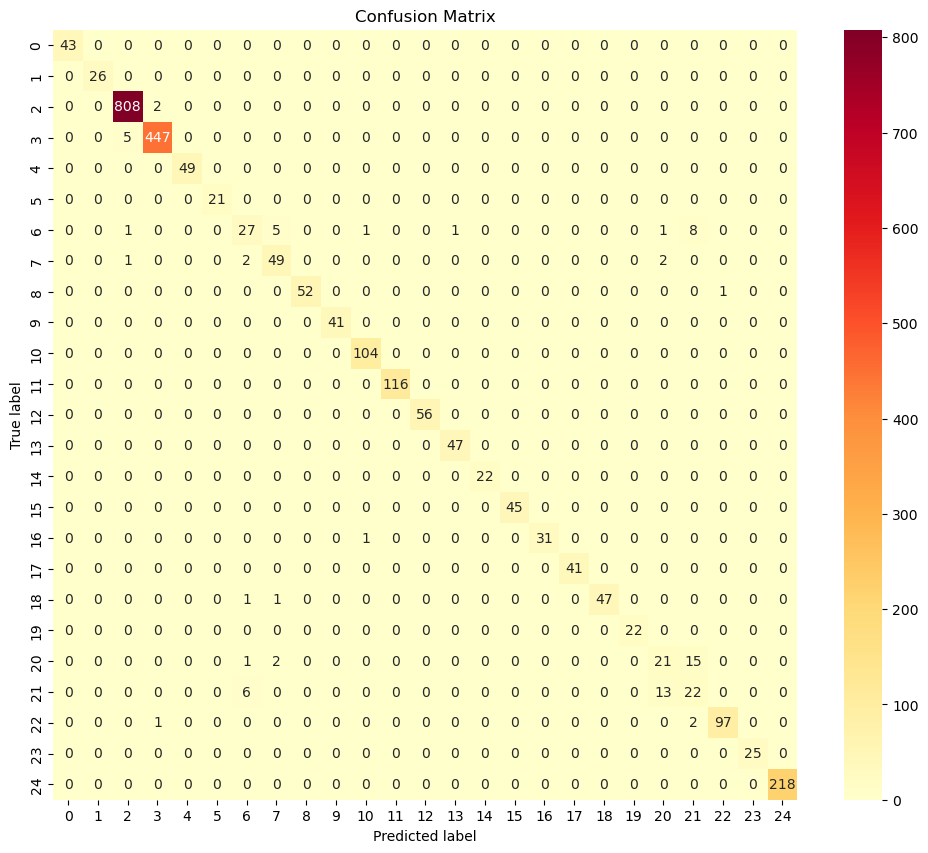

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are the true and predicted labels, respectively, of shape (2550, 1) and (2550,)

# Reshape y_test and y_pred
y_test = np.reshape(y_test, (2550,))
y_pred = np.reshape(y_pred, (2550,))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix with a different color scheme
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt='d', xticklabels=np.arange(25), yticklabels=np.arange(25))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

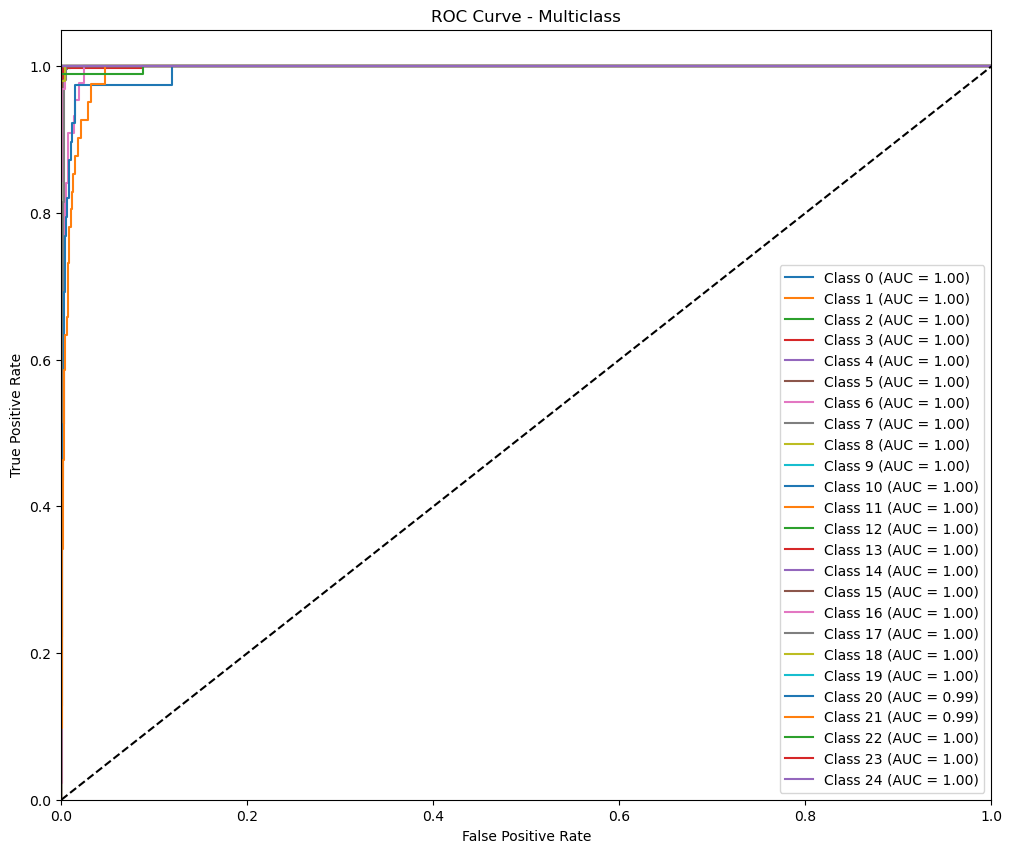

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

# Assuming y_test and y_pred are the true and predicted labels, respectively, of shape (2550, 1) and (2550,)

# Reshape y_test and y_pred
y_test = np.reshape(y_test, (2550,))
y_pred = np.reshape(y_pred, (2550,))

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.arange(25))

# Create an MLP classifier
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)

# # Create a OneVsRestClassifier
# ovr_model = OneVsRestClassifier(model)

# Fit the classifier and predict probabilities
model.fit(train_img_pca, y_train)
y_pred_proba = model.predict_proba(test_img_pca)

# Compute the ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(25):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(12, 10))
for i in range(25):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc="lower right")
plt.show()


In [99]:
from sklearn.metrics import precision_score, hamming_loss, f1_score

# Assuming y_test and y_pred are the true and predicted labels, respectively, of shape (2550, 1) and (2550,)

# Reshape y_test and y_pred
y_test = np.reshape(y_test, (2550,))
y_pred = np.reshape(y_pred, (2550,))

# Calculate precision score
precision = precision_score(y_test, y_pred, average='macro')

# Calculate Hamming loss
hamming = hamming_loss(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Hamming Loss:", hamming)
print("F1 Score:", f1)

Precision: 0.942394822530845
Hamming Loss: 0.02862745098039216
F1 Score: 0.9400516473244843


In [98]:
from sklearn.metrics import precision_score

# Assuming y_test and y_pred are the true and predicted labels, respectively, of shape (2550, 25)

# Calculate precision for each class
precision_per_class = precision_score(y_test, y_pred, average=None)

# precision_per_class will now contain precision values for each of the 25 classes
for class_index, precision in enumerate(precision_per_class):
    print(f"Precision for class {class_index}: {precision}")


Precision for class 0: 1.0
Precision for class 1: 1.0
Precision for class 2: 0.9914110429447853
Precision for class 3: 0.9933333333333333
Precision for class 4: 1.0
Precision for class 5: 1.0
Precision for class 6: 0.7297297297297297
Precision for class 7: 0.8596491228070176
Precision for class 8: 1.0
Precision for class 9: 1.0
Precision for class 10: 0.9811320754716981
Precision for class 11: 1.0
Precision for class 12: 1.0
Precision for class 13: 0.9791666666666666
Precision for class 14: 1.0
Precision for class 15: 1.0
Precision for class 16: 1.0
Precision for class 17: 1.0
Precision for class 18: 1.0
Precision for class 19: 1.0
Precision for class 20: 0.5675675675675675
Precision for class 21: 0.46808510638297873
Precision for class 22: 0.9897959183673469
Precision for class 23: 1.0
Precision for class 24: 1.0
